# RQ1 

In [59]:
import pandas as pd
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 200)

def get_clean_path(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'missing' not in file_absolute_path and 'noise' not in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list


def read_all_csv(path_list):
    df_list = []
    for path in path_list:
        tmp_df = pd.read_csv(path)
        data_name = path.split('/')[-1].split('_')[2]
        model_name = path.split('/')[-1].split('_')[0]
        tmp_df['data'] = data_name
        tmp_df['model'] = model_name
        df_list.append(tmp_df)
    df = pd.concat(df_list, ignore_index=True)
    return df
    
data_list = ['adult', 'bank', 'stroke']
approach_list = ['random_apfd','deepGini_apfd', 'entropy_apfd', 'pcs_apfd', 'vanillasoftmax_apfd', 
                'dt', 'knn', 'lr', 'nb', 'xgb']

model_list = ['dtree', 'knn', 'lr', 'nb', 'xgb']

path_list = get_clean_path('./result/')
df = read_all_csv(path_list)

all_list = []
for approach in approach_list:
    res_list = []
    for data in data_list:
        for model in model_list:
            values = df[(df['Approach']==approach)&(df['data']==data)&(df['model']==model)]['apfd'].values[0]
            values = str(round(values, 3))
            res_list.append(values)
    all_list.append(res_list)

df = pd.DataFrame(all_list, columns=model_list*3, index=approach_list)
df.to_excel('./tables/apfd_clean.xlsx', index=True)
df



,dtree,knn,lr,nb,xgb,dtree,knn,lr,nb,xgb,dtree,knn,lr,nb,xgb
random_apfd,0.508,0.506,0.493,0.505,0.5,0.502,0.494,0.504,0.49,0.494,0.519,0.505,0.502,0.497,0.499
deepGini_apfd,0.739,0.738,0.688,0.71,0.793,0.77,0.704,0.769,0.694,0.837,0.768,0.604,0.593,0.615,0.758
entropy_apfd,0.739,0.738,0.688,0.71,0.793,0.77,0.704,0.769,0.694,0.837,0.768,0.604,0.593,0.615,0.758
pcs_apfd,0.739,0.738,0.688,0.71,0.793,0.77,0.704,0.769,0.694,0.837,0.768,0.604,0.593,0.615,0.758
vanillasoftmax_apfd,0.739,0.738,0.688,0.71,0.793,0.77,0.704,0.769,0.694,0.837,0.768,0.604,0.593,0.615,0.758
dt,0.706,0.715,0.786,0.787,0.742,0.747,0.79,0.801,0.817,0.779,0.839,0.753,0.837,0.832,0.889
knn,0.787,0.775,0.737,0.739,0.729,0.823,0.775,0.784,0.782,0.792,0.765,0.626,0.589,0.604,0.669
lr,0.74,0.743,0.722,0.672,0.688,0.786,0.769,0.757,0.771,0.751,0.898,0.621,0.608,0.608,0.703
nb,0.787,0.775,0.737,0.739,0.729,0.823,0.775,0.784,0.782,0.792,0.765,0.626,0.589,0.604,0.669
xgb,0.81,0.811,0.829,0.83,0.813,0.863,0.872,0.878,0.877,0.868,0.99,0.787,0.845,0.839,0.9


# RQ2

## Average APFD

In [134]:
import pandas as pd
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 200)

def get_mixture_path(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'mixture' in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list


def read_all_csv(path_list):
    df_list = []
    for path in path_list:
        tmp_df = pd.read_csv(path)
        model_name = path.split('/')[-1].split('_')[0]
        data_type = path.split('/')[-1].split('_')[1]
        data_name = path.split('/')[-1].split('_')[2]
        tmp_df['data'] = data_name
        tmp_df['data_type'] = data_type
        tmp_df['model'] = model_name
        df_list.append(tmp_df)
    df = pd.concat(df_list, ignore_index=True)
    return df
    
data_list = ['adult', 'bank', 'stroke']
approach_list = ['random_apfd','deepGini_apfd', 'entropy_apfd', 'pcs_apfd', 'vanillasoftmax_apfd', 
                'dt', 'knn', 'lr', 'nb', 'xgb']

model_list = ['dtree', 'knn', 'lr', 'nb', 'xgb']

path_list = get_mixture_path('./result/')

df = read_all_csv(path_list)

df_noise = df[df['data_type']=='noise']

all_list = []
for approach in approach_list:
    res_list = []
    for data in data_list:
        for model in model_list:
            tmp_df = df_noise[(df_noise['Approach']==approach)&(df_noise['data']==data)&(df_noise['model']==model)]
            
            values = tmp_df['apfd'].mean()
            values = str(round(values, 3))

            res_list.append(values)
    all_list.append(res_list)
        

df_noise = pd.DataFrame(all_list, columns=model_list*3, index=approach_list)
df_noise.to_excel('./tables/apfd_mixture_noise.xlsx', index=True)
df_noise


,dtree,knn,lr,nb,xgb,dtree,knn,lr,nb,xgb,dtree,knn,lr,nb,xgb
random_apfd,0.499,0.499,0.5,0.5,0.501,0.498,0.502,0.497,0.502,0.5,0.509,0.5,0.499,0.501,0.501
deepGini_apfd,0.46,0.701,0.682,0.711,0.744,0.74,0.707,0.766,0.676,0.826,0.702,0.602,0.593,0.611,0.755
entropy_apfd,0.46,0.701,0.682,0.711,0.744,0.74,0.707,0.766,0.676,0.826,0.702,0.602,0.593,0.611,0.755
pcs_apfd,0.46,0.701,0.682,0.711,0.744,0.74,0.707,0.766,0.676,0.826,0.702,0.602,0.593,0.611,0.755
vanillasoftmax_apfd,0.46,0.701,0.682,0.711,0.744,0.74,0.707,0.766,0.676,0.826,0.702,0.602,0.593,0.611,0.755
dt,0.771,0.74,0.776,0.781,0.773,0.812,0.791,0.801,0.815,0.78,0.848,0.784,0.836,0.831,0.887
knn,0.741,0.746,0.718,0.727,0.736,0.813,0.783,0.778,0.783,0.79,0.727,0.623,0.592,0.593,0.662
lr,0.68,0.714,0.678,0.677,0.688,0.813,0.745,0.76,0.766,0.759,0.83,0.626,0.607,0.605,0.69
nb,0.741,0.746,0.718,0.727,0.736,0.813,0.783,0.778,0.783,0.79,0.727,0.623,0.592,0.593,0.662
xgb,0.83,0.81,0.825,0.827,0.829,0.867,0.872,0.875,0.875,0.868,0.982,0.825,0.845,0.838,0.898


In [135]:
df_noise.astype('float').to_numpy()[-1].mean()

0.8577333333333332

## Best cases

In [136]:
path_list = get_mixture_path('./result/')
dic = {'random_apfd':0,
       'deepGini_apfd':0,
       'vanillasoftmax_apfd':0,
       'pcs_apfd':0,
       'entropy_apfd':0,
       'xgb':0}

path_list_compare = [i for i in path_list if 'compare' in i]
path_list_model = [i.replace('compare', 'model') for i in path_list_compare]

for i in range(len(path_list_compare)):
    df_compare = pd.read_csv(path_list_compare[i])
    df_model = pd.read_csv(path_list_model[i])
    df_model = df[df['Approach']=='xgb']
    df = pd.concat([df_compare, df_model], ignore_index=True)
    tmp_dic = dict(zip(df['Approach'], df['apfd']))
    max_key = max(tmp_dic,key=tmp_dic.get)
    dic[max_key] += 1
dic

{'random_apfd': 0,
 'deepGini_apfd': 0,
 'vanillasoftmax_apfd': 0,
 'pcs_apfd': 0,
 'entropy_apfd': 0,
 'xgb': 150}

# RQ3

In [137]:
# mixture data
path_list = get_mixture_path('./result/')
dic = {'random_apfd':0,
       'deepGini_apfd':0,
       'vanillasoftmax_apfd':0,
       'pcs_apfd':0,
       'entropy_apfd':0,
       'xgb':0,
       'dt': 0,
       'knn':0,
       'lr':0,
       'nb':0
      }

path_list_compare = [i for i in path_list if 'compare' in i]
path_list_model = [i.replace('compare', 'model') for i in path_list_compare]

for i in range(len(path_list_compare)):
    df_compare = pd.read_csv(path_list_compare[i])
    df_model = pd.read_csv(path_list_model[i])
    df = pd.concat([df_compare, df_model], ignore_index=True)
    tmp_dic = dict(zip(df['Approach'], df['apfd']))
    max_key = max(tmp_dic,key=tmp_dic.get)
    dic[max_key] += 1
dic

{'random_apfd': 0,
 'deepGini_apfd': 0,
 'vanillasoftmax_apfd': 0,
 'pcs_apfd': 0,
 'entropy_apfd': 0,
 'xgb': 150,
 'dt': 0,
 'knn': 0,
 'lr': 0,
 'nb': 0}

In [138]:
# clean data
path_list = get_clean_path('./result/')
dic = {'random_apfd':0,
       'deepGini_apfd':0,
       'vanillasoftmax_apfd':0,
       'pcs_apfd':0,
       'entropy_apfd':0,
       'xgb':0,
       'dt': 0,
       'knn':0,
       'lr':0,
       'nb':0
      }

path_list_compare = [i for i in path_list if 'compare' in i]
path_list_model = [i.replace('compare', 'model') for i in path_list_compare]

for i in range(len(path_list_compare)):
    df_compare = pd.read_csv(path_list_compare[i])
    df_model = pd.read_csv(path_list_model[i])
    df = pd.concat([df_compare, df_model], ignore_index=True)
    tmp_dic = dict(zip(df['Approach'], df['apfd']))
    max_key = max(tmp_dic,key=tmp_dic.get)
    dic[max_key] += 1
dic

{'random_apfd': 0,
 'deepGini_apfd': 0,
 'vanillasoftmax_apfd': 0,
 'pcs_apfd': 0,
 'entropy_apfd': 0,
 'xgb': 15,
 'dt': 0,
 'knn': 0,
 'lr': 0,
 'nb': 0}

In [139]:
# clean data
path_list = get_mixture_path('./result/')
dic = {'random_apfd':0,
       'deepGini_apfd':0,
       'vanillasoftmax_apfd':0,
       'pcs_apfd':0,
       'entropy_apfd':0,
       'xgb':0,
       'dt': 0,
       'knn':0,
       'lr':0,
       'nb':0
      }

path_list_compare = [i for i in path_list if 'compare' in i]
path_list_model = [i.replace('compare', 'model') for i in path_list_compare]

for i in range(len(path_list_compare)):
    df_compare = pd.read_csv(path_list_compare[i])
    df_model = pd.read_csv(path_list_model[i])
    df = pd.concat([df_compare, df_model], ignore_index=True)
    tmp_dic = dict(zip(df['Approach'], df['apfd']))
    max_key = max(tmp_dic,key=tmp_dic.get)
    dic[max_key] += 1
dic

{'random_apfd': 0,
 'deepGini_apfd': 0,
 'vanillasoftmax_apfd': 0,
 'pcs_apfd': 0,
 'entropy_apfd': 0,
 'xgb': 150,
 'dt': 0,
 'knn': 0,
 'lr': 0,
 'nb': 0}

In [144]:
MLPrior𝑇=[0.706,0.715,0.786,0.787,0.742,0.747,0.790,0.801,0.817,0.779,0.839,0.753,0.837,0.832,0.889,0.771,0.740,0.776,0.781,0.773,0.812,0.791,0.801,0.815,0.780,0.848,0.784,0.836,0.831,0.887]
MLPrior𝐾=[0.787,0.775,0.737,0.739,0.729,0.823,0.775,0.784,0.782,0.792,0.765,0.626,0.589,0.604,0.669,0.741,0.746,0.718,0.727,0.736,0.813,0.783,0.778,0.783,0.790,0.727,0.623,0.592,0.593,0.662]
MLPrior𝐿=[0.740,0.743,0.722,0.672,0.688,0.786,0.769,0.757,0.771,0.751,0.898,0.621,0.608,0.608,0.703,0.680,0.714,0.678,0.677,0.688,0.813,0.745,0.760,0.766,0.759,0.830,0.626,0.607,0.605,0.690]
MLPrior𝑁=[0.787,0.775,0.737,0.739,0.729,0.823,0.775,0.784,0.782,0.792,0.765,0.626,0.589,0.604,0.669,0.741,0.746,0.718,0.727,0.736,0.813,0.783,0.778,0.783,0.790,0.727,0.623,0.592,0.593,0.662]

print(sum(MLPrior𝑇)/len(MLPrior𝑇))
print(sum(MLPriorK)/len(MLPriorK))
print(sum(MLPriorL)/len(MLPriorL))
print(sum(MLPriorN)/len(MLPriorN))


0.7948666666666667
0.7262666666666667
0.7158333333333335
0.7262666666666667


# RQ4

In [180]:
import os
import json

def get_path(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.json'):
                    path_list.append(file_absolute_path)
    return path_list

path_json_list = sorted(get_path('importance/'))
data_list = [i.split('/')[-1].split('_')[1] for i in path_json_list]
model_list = [i.split('/')[-1].split('_')[-1].split('.')[0] for i in path_json_list]

dic_list = [json.load(open(i, 'r')) for i in path_json_list]

df_all = pd.DataFrame(columns=['0'+'_'+'feature'])
for i in range(len(dic_list)):
    df = pd.DataFrame([dic_list[i]]).T.reset_index().rename(columns={"index": "feature", 0: "value"}).sort_values(by=['value'], ascending=False).head(10)
    
    df_all[str(i)+'_'+'feature'] = df['feature']
    df_all[str(i)+'_'+'value'] = df['value'].astype(int)
df_all.to_excel('./tables/feature_importance.xlsx', index=True)  
df_all


,0_feature,0_value,1_feature,1_value,2_feature,2_value,3_feature,3_value,4_feature,4_value,5_feature,5_value,6_feature,6_value,7_feature,7_value,8_feature,8_value,9_feature,9_value,10_feature,10_value,11_feature,11_value,12_feature,12_value,13_feature,13_value,14_feature,14_value
0,f21,1544,f44,2786,f127,3140,f123,1653,f118,2976,f25,1410,f49,1851,f131,1447,f122,2313,f126,1566,f4,1006,f28,1534,f124,844,f110,1526,f4,1523
1,f10,1358,f45,2658,f129,2550,f29,1605,f120,2674,f4,1053,f17,1427,f117,1417,f31,1499,f8,1061,f5,758,f18,1080,f115,783,f83,736,f111,1322
2,f11,1342,f19,2127,f131,1970,f127,1369,f5,1660,f22,1040,f35,1262,f120,1199,f72,1380,f123,1042,f7,706,f38,985,f7,718,f2,465,f122,807
3,f5,1096,f26,1536,f5,1175,f5,1362,f131,1586,f7,710,f46,1096,f4,1148,f27,1096,f4,964,f8,625,f29,952,f4,648,f35,430,f2,729
4,f2,630,f49,1429,f126,1093,f10,1339,f126,1460,f8,696,f8,971,f7,1094,f127,1080,f134,953,f1,530,f4,827,f8,645,f55,424,f3,706
5,f9,585,f5,1252,f10,961,f67,1217,f10,1429,f18,527,f31,933,f135,794,f58,1001,f129,874,f16,507,f42,801,f113,541,f28,320,f8,482
6,f23,576,f31,1124,f11,793,f82,1172,f11,1140,f13,508,f27,929,f122,730,f60,989,f7,753,f18,415,f7,728,f127,530,f5,251,f7,455
7,f17,544,f53,1122,f114,773,f11,1016,f128,809,f11,495,f42,923,f8,721,f4,798,f128,718,f12,401,f40,696,f5,472,f112,241,f123,393
8,f13,538,f10,1083,f117,759,f43,1005,f13,778,f5,369,f41,828,f11,584,f86,785,f122,610,f9,394,f5,589,f122,426,f45,165,f5,363
9,f15,498,f16,1061,f115,692,f129,976,f2,594,f6,363,f55,807,f13,556,f108,784,f6,521,f3,390,f8,579,f114,352,f8,129,f1,267


# Plot

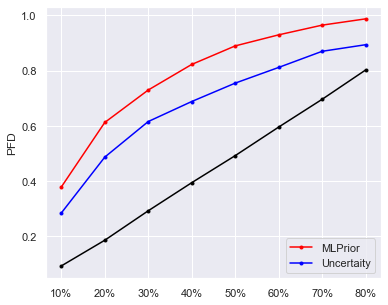

In [192]:
# RQ1
#NB bank
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mlprior = [0.3789, 0.6124, 0.7297, 0.8222, 0.8892, 0.9292, 0.9643, 0.987]
uncertaity = [0.2849, 0.487, 0.6157, 0.6881, 0.7546, 0.8114, 0.8697, 0.8935]

random = [0.0935, 0.1865, 0.293, 0.3946, 0.4924, 0.5957, 0.6962, 0.8022]


plt.figure(figsize=(6, 5))

x = ['10%', '20%','30%', '40%', '50%', '60%', '70%', '80%']
plt.plot(x, mlprior, color="red", marker='o', markersize=3)
plt.plot(x, uncertaity, color="blue", marker='o', markersize=3)
plt.plot(x, random, color="black", marker='o', markersize=3)
plt.ylabel("PFD")
# 设置图例
plt.legend(['MLPrior', 'Uncertaity'], loc="lower right")

plt.savefig('tables/bank_nb_rq1.pdf', dpi=300, transparent=False)
plt.show()


In [ ]:
# RQ2
#NB bank
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mlprior = [0.3789, 0.6124, 0.7297, 0.8222, 0.8892, 0.9292, 0.9643, 0.987]
uncertaity = [0.2849, 0.487, 0.6157, 0.6881, 0.7546, 0.8114, 0.8697, 0.8935]


random = [0.0935, 0.1865, 0.293, 0.3946, 0.4924, 0.5957, 0.6962, 0.8022]


plt.figure(figsize=(6, 5))

x = ['10%', '20%','30%', '40%', '50%', '60%', '70%', '80%']
plt.plot(x, mlprior, color="red", marker='o', markersize=3)
plt.plot(x, uncertaity, color="blue", marker='o', markersize=3)
plt.plot(x, random, color="black", marker='o', markersize=3)
plt.ylabel("PFD")
# 设置图例
plt.legend(['MLPrior', 'Uncertaity'], loc="lower right")

plt.savefig('tables/bank_nb_rq1.pdf', dpi=300, transparent=False)
plt.show()